Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel $\rightarrow$ Restart) and then **run all cells** (in the menubar, select Cell $\rightarrow$ Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Bongani Ncube"
StudentID = "u25503848"

---

## COS 760  Homework 2 - Part 3 - 2025 (35 points)
## Topic Modelling

* Year: **2025**
* Author: Prof **Vukosi Marivate**, **Fiskani Banda**
* Contact: vukosi.marivate@cs.up.ac.za

**You will learn how to:**
- Latent Dirichlet Allocation Topic Modelling
- Non-negative Matrix Factorization Topic Modelling
- NLTK Stemming,  

**Note:** you can experiment by adding aditional cells, but they must be removed from final solution. Only the cells originally in the notebook plus the ones you have filled with your solution are required.

## 1 Packages ##

Scikit-Learn for text Analysis
- [sklearn](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html): Scikit-Learn Working With Text Data
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip install wordcloud
!pip install nltk

In [4]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import string

## Fetch the AriseTV  news article


In [5]:
url='https://raw.githubusercontent.com/chimaobi-okite/NLP-Projects-Competitions/refs/heads/main/NewsCategorization/Data/train.csv'
df = pd.read_csv(url)
print("Number of records (news articles): ",df.shape[0])
df.head()

Number of records (news articles):  4686


,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics


In this homework, we are now much interested in the categories. We want to explore the data **without** categories/labels. So lets save the ext data in *documents*. We also are going to go ahead and convert our data via TFIDF

In [6]:
documents = df.Excerpt

vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(documents)
X_dtm_tfidf = vectorizer_tfidf.transform(documents)
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

## Q1.1: Using LDA to extract topics from our data [5 points]

**Resources:**
* What is LDA? - [Intuitive Guide to Latent Dirichlet Allocation](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158)
* LDA Video - [LDA Algorithm Description](https://www.youtube.com/watch?v=DWJYZq_fQ2A)


**Task:**

Use the [`LatentDirichletAllocation`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html) algorithm in sklearn to fit a LDA model on *X_dtm_tfidf* with **4 components/topics**, use a **random_state=0** [5 Points]

**Outputs:**
* Save your model in object *lda_tfidf*

**Note:** Training might take a while. Be patient

In [7]:
# Helper function to print
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

# Helper function to visualize the topics/themes
def wordcloud_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        cloud_text = " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        # Create the wordcloud object
        wordcloud = WordCloud(width=480, height=480, margin=0,background_color = 'white').generate(cloud_text)
        fig1, ax1 = plt.subplots()
        # Display the generated image:
        ax1.imshow(wordcloud, interpolation='bilinear')
        ax1.axis("off")
        plt.tight_layout(pad = 0)
        plt.title("Topic %s" % topic_idx,fontsize = 12)


In [8]:
def fit_LDA(X, n_components):
    lda_model = LatentDirichletAllocation(n_components=
                                           n_components,
                                          learning_method='online',
                                          max_iter=20,
                                           random_state=0)


    lda_model.fit(X)
    return lda_model


In [9]:
# A1 5 Points
# Lets start first by assuming we have 4 underlying topics. We can change this later.
n_components = 4
num_top_words= 20
lda_tfidf = fit_LDA(X_dtm_tfidf, n_components)
X_lda_tfidf_membership = lda_tfidf.transform(X_dtm_tfidf)

print_top_words(lda_tfidf, tfidf_feature_names, num_top_words)

assert lda_tfidf.n_components == 4
assert lda_tfidf.random_state == 0
assert X_lda_tfidf_membership.shape[1] == 4
assert X_lda_tfidf_membership.shape[0] == X_dtm_tfidf.shape[0]

Topic #0: bayern munich boy burna kong hong bundesliga magic johnny nasa lewandowski robert art designer nike satan shoes collective drop depp
Topic #1: the to of in on and has for as its nigeria with from at that is after will covid bank
Topic #2: the of president has on to in nigeria and state national for that his former party all presidential as buhari
Topic #3: opec exporting edo actor captain operators obaseki max argentina babajide sanwo olu olympics hospital age gold hotel legend kuti formula



# Q 1.2 (5 points)
**Topic Interpretation:** Look at the top 10 words for each topic generated by LDA + Bag of Words

Assign a meaningful label to each topic and justify your choice. How confident are you in your assignments?

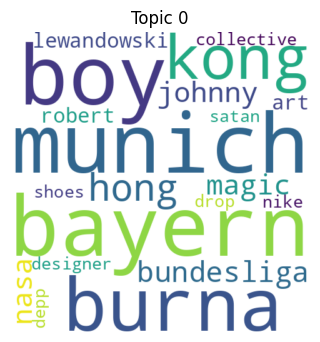

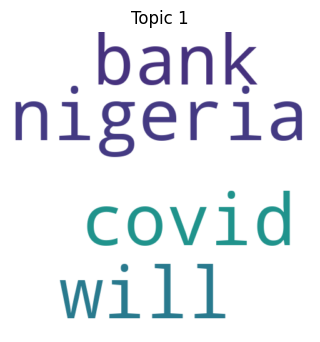

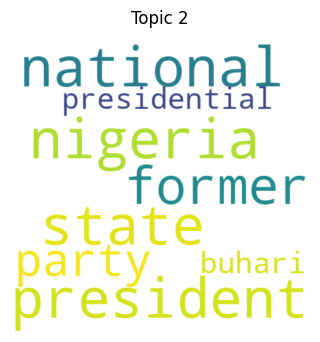

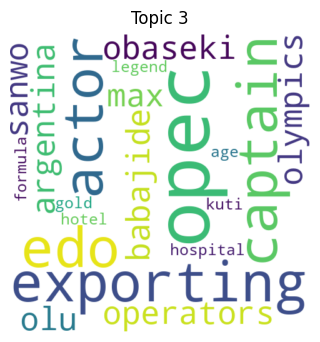

In [10]:
figsize(3,3)
wordcloud_top_words(lda_tfidf, tfidf_feature_names, num_top_words)

Topic 0 - Pop Culture and Football. Confidence=medium. Topic 1- Nigeria. Confidence = High. Topic 2- Nigeria. Confidence= High Topic 3- Nigeria and Entertainment

## Q2.1: Improving LDA through better TFIDF model [6 points]

Now, looking at your answers from Q1, you will see that the topics printed by print_top_words dont make much sense. Lets look at a few ways we can improve this. First challenge is that the amount of tokens on the full data is large. Also we have a lot of stop words,

**Task:**
* Let us limit the `TfidfVectorizer` to about **5000 tokens** (*max_features*) and set the `TfidfVectorizer` to remove english stopwords.
* Save the new vectorizer as vectorizer_tfidf_lim

In [11]:
# A2.1 2 Points
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vectorizer_tfidf_limit = TfidfVectorizer(max_features=5000, stop_words='english')

vectorizer_tfidf_limit.fit(documents)
X_dtm_tfidf_limit = vectorizer_tfidf_limit.transform(documents)
tfidf_feature_names_limit = vectorizer_tfidf_limit.get_feature_names_out()

Topic #0: state governor president dr progressives apc nigerian congress senate house chairman twitter trump donald election chief governors won mr ruling
Topic #1: nigeria covid government 19 federal said nigerian oil country million billion petroleum coronavirus minister vaccine new company world year monday
Topic #2: league party president manchester democratic presidential national nigeria city premier united pdp peoples buhari cup muhammadu champions chelsea win congress
Topic #3: bank central president cbn biden nigeria organisation joe governor mr opec new said thursday trump emefiele godwin exporting russian service



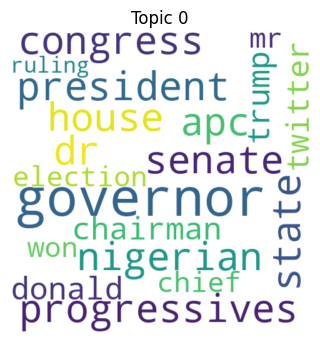

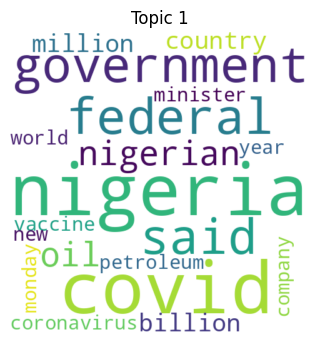

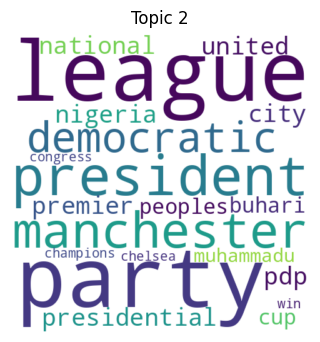

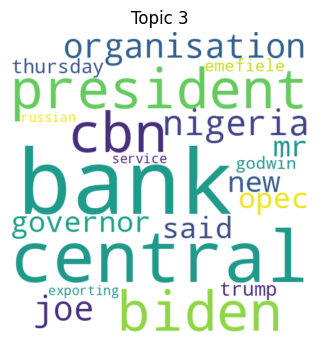

In [12]:
lda_tfidf_limit = fit_LDA(X_dtm_tfidf_limit, n_components)
X_lda_tfidf_limit_membership = lda_tfidf_limit.transform(X_dtm_tfidf_limit)

# Print new topics
print_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)
wordcloud_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)

In [13]:
assert X_dtm_tfidf_limit.shape[1] == 5000
assert vectorizer_tfidf_limit.max_features == 5000
assert vectorizer_tfidf_limit.stop_words == 'english'

Topic #0: organisation opec house exporting countries representatives petroleum white operators oil continues members allies mark crude dr moves ngozi association appeared
Topic #1: nigeria nigerian president federal government oil national country said billion petroleum tuesday thursday monday company buhari million muhammadu group court
Topic #2: bank central cbn nigeria emefiele godwin governor mr euro export import pan naira plc release yoruba apex newly hotel republic
Topic #3: grand released 30 captain italy musk digital championship elon currency boy champion burna twitter max drama nadal slam rafael red
Topic #4: trump donald senate ahmad lawan attack claims streaming voted osun lawsuit joining hopeful president anyim oyetola protesters long outlook cross
Topic #5: joshua space anthony taken heavyweight opening argentina guinea spot alliance work town putin copa brazilian far vladimir title uganda brazil
Topic #6: manchester league city super manager football premier game eagle

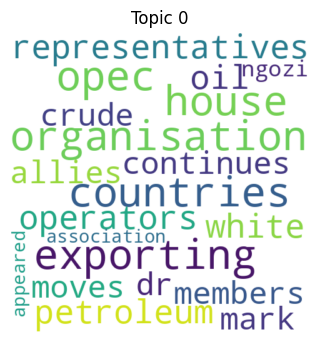

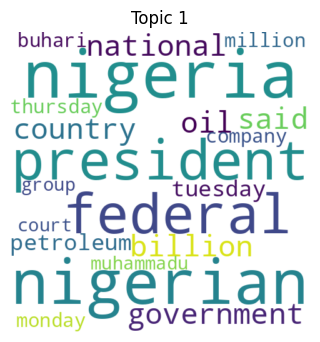

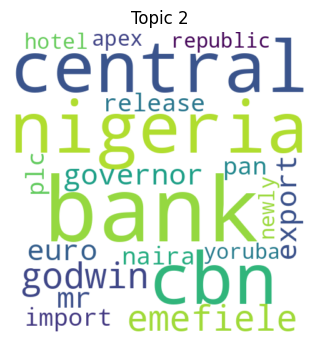

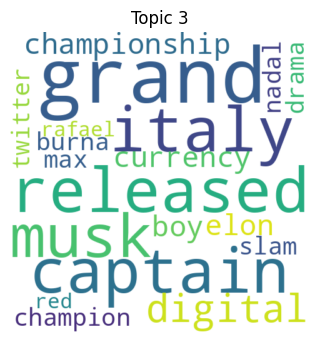

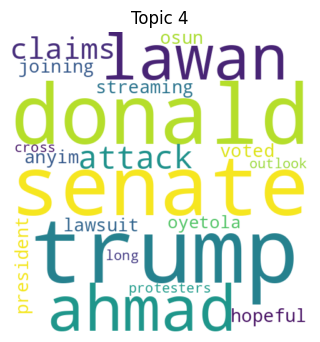

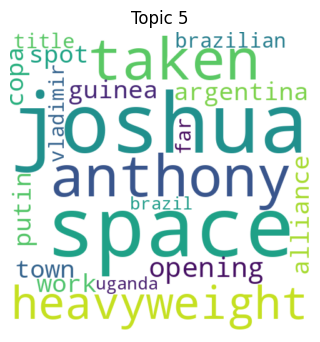

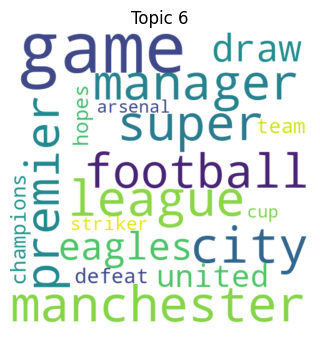

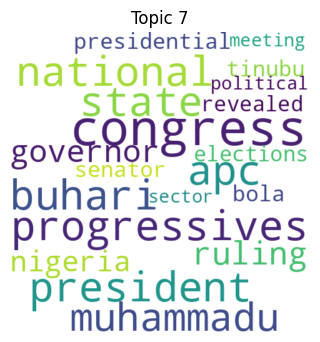

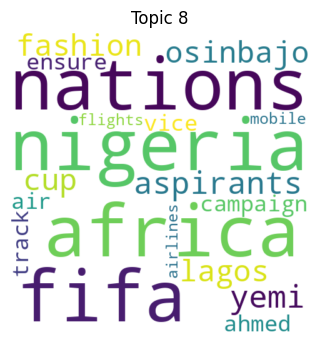

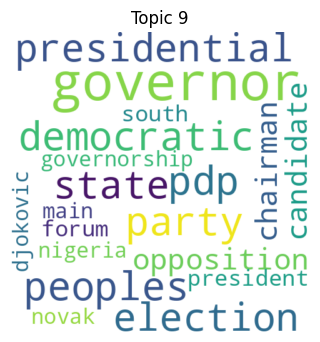

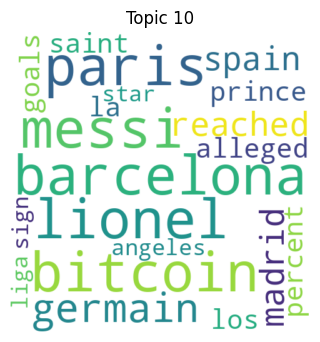

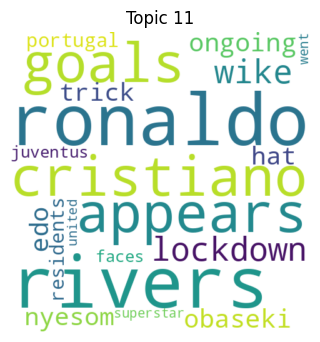

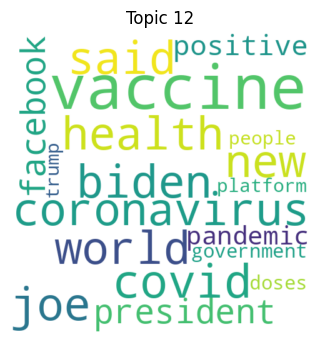

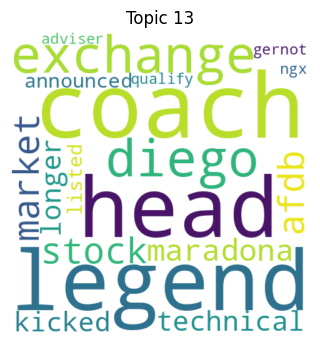

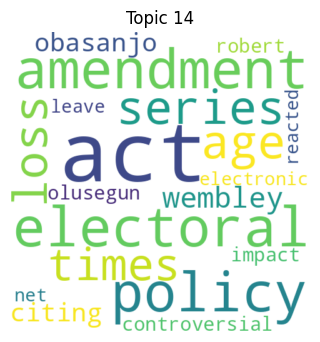

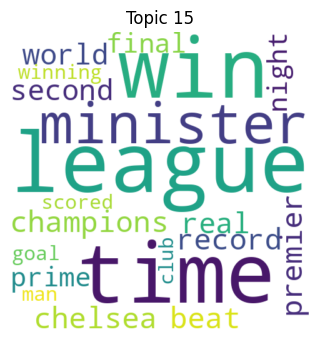

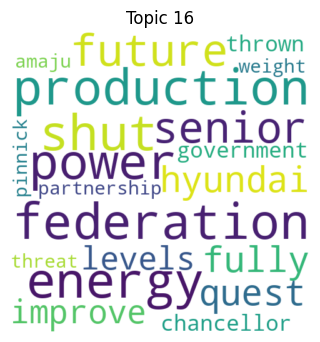

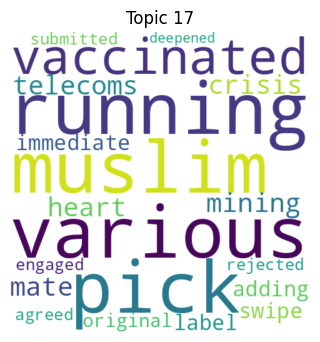

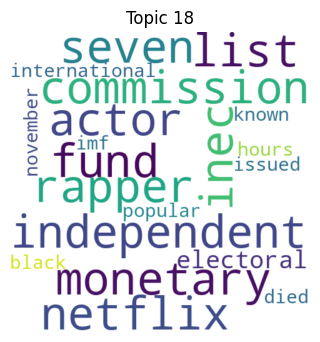

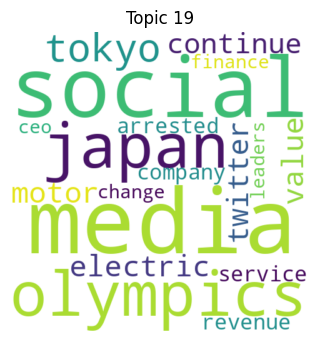

In [14]:
n_components = 20
lda_tfidf_limit = fit_LDA(X_dtm_tfidf_limit, n_components)
X_lda_tfidf_limit_membership = lda_tfidf_limit.transform(X_dtm_tfidf_limit)

# Print new topics
print_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)
wordcloud_top_words(lda_tfidf_limit, tfidf_feature_names_limit, num_top_words)

### Observations
* a) **Topic Interpretation:** Look at the top 10 words for each topic generated by LDA + TFIDF. Assign a meaningful label to each topic and justify your choice. How confident are you in your assignments? (5 points)
* b) Can you compare this to the kmeans clustering? What are your main takeaways. (2 points)

| **Topic #** | **Top Words (Shortened)**                                  | **Label**                           | **Justification**                                              | **Confidence** |
| ----------- | ---------------------------------------------------------- | ----------------------------------- | -------------------------------------------------------------- | -------------- |
| 0           | organisation, opec, petroleum, exporting, oil, crude       | Oil & Energy Organizations          | OPEC and petroleum terms dominate this topic.                  | High           |
| 1           | nigeria, president, buhari, petroleum, government, billion | Nigerian Government & Oil           | Repeated mentions of Nigerian leadership and oil policy.       | High           |
| 2           | bank, cbn, emefiele, euro, naira                           | Central Banking & Currency          | Strong financial and central bank terminology.                 | High           |
| 3           | italy, musk, elon, burna, nadal, drama                     | Entertainment & Sports Celebrities  | Mix of celebrities in tech, music, and sports.                 | Medium         |
| 4           | trump, senate, osun, lawsuit, protestors                   | U.S. & Nigerian Politics & Protests | Mix of Trump-related and Nigerian political conflict.          | Medium         |
| 5           | joshua, anthony, putin, brazil, argentina                  | Global Sports & Politics            | Mentions of both political and sports figures; slightly mixed. | Medium         |
| 6           | manchester, league, eagles, united, arsenal                | Football / Soccer                   | Clearly about football clubs and competitions.                 | High           |
| 7           | congress, apc, buhari, elections, tinubu                   | Nigerian Political System           | Nigerian parties (APC) and elections dominate.                 | High           |
| 8           | fifa, lagos, flights, vice, campaign                       | African Politics & Aviation         | A mix of campaign, political figures, and airlines.            | Medium         |
| 9           | pdp, opposition, governors, candidate, djokovic            | Elections & Opposition Parties      | PDP and other political structures, mixed with a sports name.  | Medium         |
| 10          | barcelona, messi, madrid, star, goals                      | International Football              | Focus on top global football players and teams.                | High           |
| 11          | ronaldo, juventus, lockdown, obaseki, superstar            | Sports & COVID Restrictions         | Mix of sports and lockdown-related terms.                      | Medium         |
| 12          | covid, vaccine, biden, pandemic, facebook                  | COVID-19 & Global Health            | Clearly pandemic and vaccine-related content.                  | High           |
| 13          | maradona, stock, ngx, kicked, listed                       | Finance & Legendary Sports Figures  | Maradona + stock exchange terms makes it slightly split.       | Medium         |
| 14          | electoral, amendment, obasanjo, controversial, policy      | Governance & Electoral Reforms      | Words focus on political reforms and older political figures.  | High           |
| 15          | premier, final, chelsea, goal, champions                   | Football Championships              | Pure sports terms, especially clubs and finals.                | High           |
| 16          | power, energy, federation, future, pinnick                 | Energy & Infrastructure             | Energy and national policy keywords.                           | High           |
| 17          | mining, muslim, telecoms, heart, rejected                  | Mixed Policy & Society Issues       | A broad mix — could suggest societal infrastructure.           | Low            |
| 18          | inec, electoral, netflix, imf, fund                        | Electoral Bodies & Global Orgs      | INEC, IMF, and electoral issues dominate.                      | Medium         |
| 19          | olympics, tokyo, twitter, revenue, leaders                 | Olympics & Media                    | Focused on sports events and media/tech influence.             | Medium         |
b. LDA + TF IDF provides more interpretable and thermetically coherant groupings. KMeand might find similar groupings but without labled themes, it is useful for documenting groups but less human readble. LDA is better when your goal is understanding topics and themes KMeans is more suitable when you care about group seperation.


## Q3: Fitting an Non-Negative Matrix Factorization (NMF) model [6 points]

In this section you will now look at using Non-Negative Factorization. What do you observe in the results.

**Task:**

Use the [`Non-Negative Matrix Factorization (NMF)`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) algorithm in sklearn to fit a NMF model on *X_dtm_tfidf* with **4 components/topics**, use a **random_state=0** [2 Points]

In [15]:
n_components = 4

In [16]:

def fit_NMF(X, n_components):
    from sklearn.decomposition import NMF
    nmf_tfidf_limit = NMF(n_components=n_components,
                          random_state=0)
    nmf_tfidf_limit.fit(X)
    return nmf_tfidf_limit

In [17]:
nmf_tfidf_limit = fit_NMF(X_dtm_tfidf_limit, n_components)
print_top_words(nmf_tfidf_limit, tfidf_feature_names_limit, num_top_words)

Topic #0: covid 19 vaccine health world vaccines pfizer doses astrazeneca said coronavirus new government pandemic million use organization states received people
Topic #1: congress progressives party president apc democratic presidential peoples pdp national state buhari muhammadu ruling candidate chairman governor election opposition senator
Topic #2: nigeria bank central cbn government mr federal nigerian governor petroleum emefiele godwin said oil billion country thursday company monday tuesday
Topic #3: league manchester premier city champions united chelsea win final liverpool cup scored beat victory madrid goal club time arsenal season



### Q3.2 Observations

* a) What do you observe in the NMF Topics? [2 points]
* b) Can you compare this to your observations in LDA as well as the prior k-means clustering [2 points]

### A3.2
Topic 0- Public health and COVID-19, With emphasis on vaccines and global response    
Topic 1 - Politics and Elactions especially in Nigeria, referancing major parties and key figures
Topic 2- Economic and Finacial Matters, with strong presence of terms related to CBN and petrolium.
b. LDA - Captured useful themes, its topics are more diffused and overlapping with some words appearing in multiple topics.NMF in constract gave sharper boundries between topics.
KMeans Clustering- grouped documents based on similarities but did not produce easily interpretable topics.

## Q4: Experiment - Stemming and/Lemmatizing [8 points]

In this section, you can experiment with stemming. Below is some code that you can use to play around with stemming and lematizing. You can use multiple Stemmers. You can read this resources on Stemming and Lemmatizing - [https://www.datacamp.com/community/tutorials/stemming-lemmatization-python](https://www.datacamp.com/community/tutorials/stemming-lemmatization-python)

* In A4.1 Leave the final configuration you want me to see. [4 points]
* In A4.2 Discuss your results and why you chose them. [4 points]

In [18]:
import nltk
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
# A
nltk.download('punkt')
from nltk.stem.porter import PorterStemmer
import string
stemmer = PorterStemmer()

def tokenize(text):
    punctuations = list(string.punctuation)
    tokens = nltk.word_tokenize(text)
    tokens = [x.lower() for x in tokens if x not in punctuations]
    stems = [stemmer.stem(token) for token in tokens]
    return stems

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [20]:
text = 'The men where jumping over the fences'
print('Original text: ', text)
print('Stemmed/Lemmatized text: ', " ".join(tokenize(text)))

Original text:  The men where jumping over the fences


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


You can pass the tokenize function to the TfidfVectorizer as a special **tokenizer**. Save your new vectorizer as *vectorizer_tfidf_limit_stem*

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Your codee must be over this line.
vectorizer_tfidf_limit_stem.fit(documents)
X_dtm_tfidf_limit_stem = vectorizer_tfidf_limit_stem.transform(documents)
tfidf_feature_names_limit_stem = vectorizer_tfidf_limit_stem.get_feature_names_out()

In [ ]:
n_components = 4

lda_tfidf_limit_stem = fit_LDA(X_dtm_tfidf_limit_stem, n_components)
X_lda_tfidf_limit_membership_stem = lda_tfidf_limit_stem.transform(X_dtm_tfidf_limit_stem)

# Print new topics
print_top_words(lda_tfidf_limit_stem, tfidf_feature_names_limit_stem, num_top_words)

In [ ]:
wordcloud_top_words(lda_tfidf_limit_stem, tfidf_feature_names_limit_stem, num_top_words)

### Q4.2

What are your observations with:
* a) Stemming [2 points],
* b) and lemmatization? [2 points]
* c) What other ways can we improve this [2 points]


### A4.2

YOUR ANSWER HERE